In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import lmfit
import numpy as np
from astropy.io import ascii
from astropy import units as u
from lmfit.models import PolynomialModel, GaussianModel
from lmfit import Model as mod
from lmfit import minimize, Parameters, report_fit

In [3]:
# Open the file in read mode
with open('C:/Users/dhami/Research/STARTastro/DhamiBusch-Research25/OHData/158375n19250_65_ii.ascii', 'r') as file:
    # Read the content of the file
    content = file.read()
# Print the content
print(content)

Scan:      6     158375-19250 2023-10-13 +11 50 50.5
          RADIO                  Ta    
        km/s-LSR                 I
       -1344.667638269765     -0.1969397
       -1343.740640240886     -0.1929289
       -1342.813642212007     -0.1956574
       -1341.886644183195     -0.1915557
       -1340.959646154316     -0.1923949
       -1340.032648125504     -0.1951241
       -1339.105650096625     -0.1991728
       -1338.178652067746     -0.1947215
       -1337.251654038934     -0.1947283
       -1336.324656010055     -0.1967613
       -1335.397657981242     -0.1939715
       -1334.470659952364     -0.1937665
       -1333.543661923552     -0.1967330
       -1332.616663894673     -0.1971419
       -1331.689665865794     -0.1927554
       -1330.762667836982     -0.1880428
       -1329.835669808103     -0.1871430
       -1328.908671779224     -0.1896689
       -1327.981673750412     -0.1897209
       -1327.054675721533     -0.1900757
       -1326.127677692654     -0.1826919
       -132

In [6]:
# started at 4 because data has headings and we want to skip that and jump straight to the numbers
data = ascii.read(file_path, data_start=4)
x=data['col1']
y=data['col2']

In [7]:
# Replace 'file_path.txt' with the path to your ASCII file
file_path = 'C:/Users/dhami/Research/STARTastro/DhamiBusch-Research25/OHData/158375n19250_65_ii.ascii'
# Load the ASCII file into a DataFrame
df = pd.read_csv(file_path)
# Display the first few rows of the DataFrame
print(data)

       col1             col2    
------------------ -------------
-1343.740640240886    -0.1929289
-1342.813642212007    -0.1956574
-1341.886644183195    -0.1915557
-1340.959646154316    -0.1923949
-1340.032648125504    -0.1951241
-1339.105650096625    -0.1991728
-1338.178652067746    -0.1947215
-1337.251654038934    -0.1947283
-1336.324656010055    -0.1967613
-1335.397657981242    -0.1939715
-1334.470659952364    -0.1937665
-1333.543661923552     -0.196733
-1332.616663894673    -0.1971419
               ...           ...
 1681.053927913258  -0.007642043
 1681.980925942104  -0.007933455
 1682.907923970983  0.0008266279
 1683.834921999828   0.006281571
 1684.761920028674 -0.0001936971
 1685.688918057552  -0.001893848
 1686.615916086365  -0.004103886
 1687.542914115244   0.003867748
 1688.469912144122  0.0004104335
 1689.396910172935   0.002818394
 1690.323908201814   0.004463519
 1691.250906230692  0.0004873652
 1692.177904259505 -0.0001480994
Length = 3276 rows


C:\Users\dhami\AppData\Local\Temp\ipykernel_10176\3440884866.py:12: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


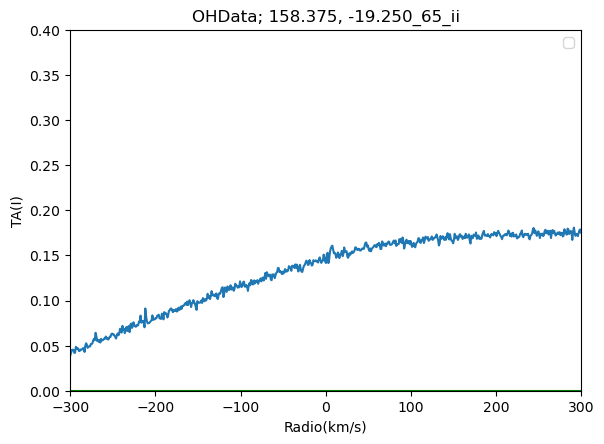

In [10]:
gooddata = np.where((x >= -300) & (x <= 300))
x = x[gooddata]
y = y[gooddata]
plt.xlim([-300, 300])
plt.ylim([0, .40])

plt.plot(x,y)
plt.axhline(0, color='green')
plt.xlabel('Radio(km/s)') # Creates a label for the x axis
plt.ylabel('TA(I)') # Creates a label for the y axis
plt.title('OHData; 158.375, -19.250_65_ii') # Creates a title for the plot
plt.legend()

plt.tight_layout(pad=2.0) # so data doesn't overlap

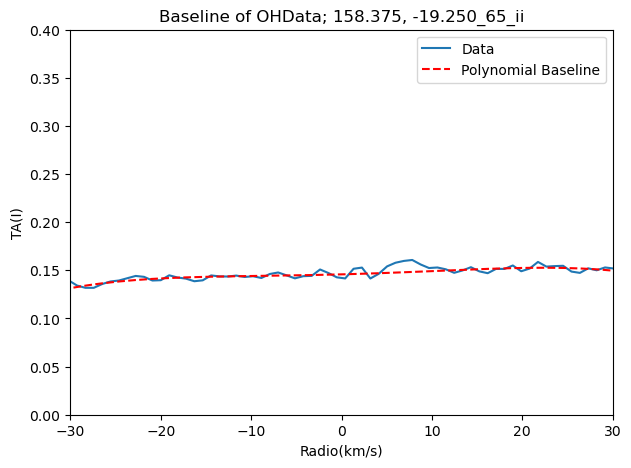

In [30]:
#Create a model and set initial parameters
degree = 4
poly_model = PolynomialModel(degree=degree)

# Baseline regions:
gooddata1 = list(np.where((x >= -30) & (x <= 0))[0])
gooddata2 = list(np.where((x >= 10) & (x <= 30))[0])
gooddata = gooddata1 + gooddata2

# Do the fitting:
params = poly_model.guess(y[gooddata], x=x[gooddata])
result = poly_model.fit(y[gooddata], params, x=x[gooddata])

#params =  poly_model.guess(y, x=x)
#result = poly_model.fit(y, params, x=x)
#print(result.fit_report())
# generates fitted values
y_eval = poly_model.eval(result.params, x=x)

# Plot data and baseline
plt.figure(figsize=(7, 5))
plt.xlim([-30, 30])
plt.ylim([0, .40])

plt.plot(x, y, label='Data')
plt.plot(x, y_eval, label='Polynomial Baseline', color='red', linestyle='--')
plt.xlabel('Radio(km/s)')
plt.ylabel('TA(I)')
plt.title('Baseline of OHData; 158.375, -19.250_65_ii')
plt.legend()
plt.show()

In [19]:
# Subtract Baseline
y_sub = y-y_eval

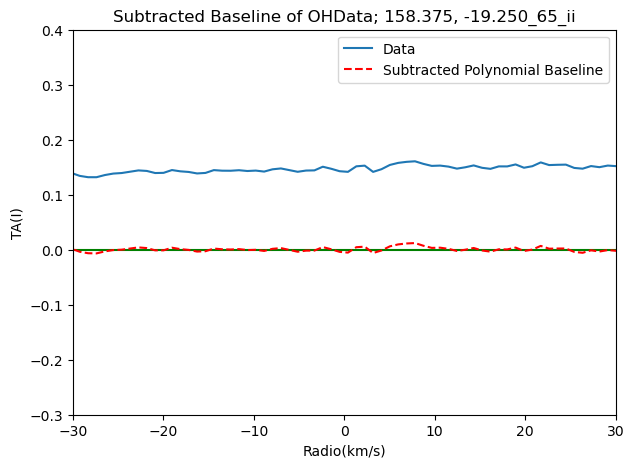

In [31]:
# Baseline regions:
gooddata1 = list(np.where((x >= -30) & (x <= 0))[0])
gooddata2 = list(np.where((x >= 10) & (x <= 30))[0])
gooddata = gooddata1 + gooddata2

# Do the fitting:
params = poly_model.guess(y_sub[gooddata], x=x[gooddata])
result = poly_model.fit(y_sub[gooddata], params, x=x[gooddata])

# Plot data and baseline
plt.figure(figsize=(7, 5))
plt.xlim([-30, 30])
plt.ylim([-.30, .40])

plt.axhline(0, color='green')
plt.plot(x, y, label='Data')
plt.plot(x, y_sub, label='Subtracted Polynomial Baseline', color='red', linestyle='--')
plt.xlabel('Radio(km/s)')
plt.ylabel('TA(I)')
plt.title('Subtracted Baseline of OHData; 158.375, -19.250_65_ii')
plt.legend()
plt.show()

In [13]:
# RMS red
noise=np.std(y[gooddata]) * u.K
noise

<Quantity 0.00881203 K>

In [14]:
noise_sub=np.std(y_sub[gooddata]) * u.K
noise_sub
#noise_sub.to('mK')

<Quantity 0.00330451 K>

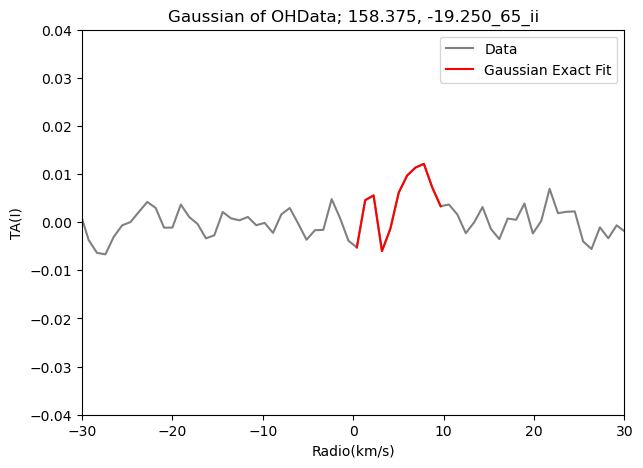

In [32]:
# Gaussian Model-exact fit
gauss_model=GaussianModel()
region = np.where((x >= 0) & (x <= 10))[0]

# Plot data and baseline
plt.figure(figsize=(7, 5))
#plt.axhline(0, color='green')
plt.plot(x, y_sub, label='Data', linestyle='solid', color='grey')
plt.xlim([-30, 30])
plt.ylim([-.04, .04])
plt.plot(x[region], y_sub[region], '-',label='Gaussian Exact Fit',color='r')
plt.xlabel('Radio(km/s)')
plt.ylabel('TA(I)')
plt.title('Gaussian of OHData; 158.375, -19.250_65_ii')
plt.legend()
plt.show()

In [24]:
# # Over fit of Gaussian-not accurate enough
# params = gauss_model.guess(y_sub[region], x=x[region])
# regionfit = gauss_model.fit(y_sub[region], params, x=x[region])
# y_gauss_region = gauss_model.eval(params, x=x)

# #plot

# plt.axhline(0, color='k')
# plt.plot(x, y_sub, label='Data', linestyle='solid', color='grey')
# plt.xlim([-30, 30])
# plt.ylim([-.04, .04])
# plt.step(x, y_gauss_region, '-',label='Gaussian Guess',color='r')
# plt.xlabel('Radio(km/s)')
# plt.ylabel('TA(I)')
# plt.title('Gaussian of OHData; 158.375, -19.250_65_ii')
# plt.legend()
# plt.show()

In [33]:
# Better fit of Gaussian
def gaussFit(vel, ta, bounds):
    '''
    Purpose:
    This function fits 4 features in a single spectrum, the features assumed to be the Local arm, inter arm, perseus arm, and outer arm.
    Adjust the features as needed.
    
    Input:
    vel -- x axes, velocity
    ta -- y axes, antenna temperature
    bounds -- an array of bounds for np.where commands later in the function to setup fit ranges.
    n = number of gaussian components

    Output:
    fitResult -- an array of 3 fit results from LMFIT for a single gaussian
    '''
# def gaussFit(vel, ta, bounds):
#     '''
#     Fits `n_gaussians` Gaussians to the data (x, y) in the masked region.

#     Parameters:
#     - x: full x array
#     - y: full y array
#     - region_mask: boolean array selecting the region to fit
#     - n_gaussians: number of Gaussians to fit
#     - prefix_base prefix for the model params (for naming)

#     Returns:
#     - fit_result: lmfit ModelResult
#     - model: the combined lmfit model
#     '''
    # Define model:
    # Fit arbitary n gaussians.
    
    # Initialize composite model
    # model = None
    # params = None
    # for i in range(n_gaussians):
    #     prefix = f"{prefix_base}{i}_"
    #     gauss = GaussianModel(prefix=prefix)
    #     # Use guess to get initial parameters
    #     fit = gauss.fit(y_sub, x=x)
    #     if model is None:
    #         model = gauss
    #         params = fit
    #     else:
    #         model += gauss
    #         params.update(fit)

    # fit_result = model.fit(y_sub, params, x=x)
    # return fit_result, model
    x = vel
    y_sub = ta
    # # Set bounds:
    region = np.where((x >= bounds[0]) & (x <= bounds[1]))[0]
    # # Initial Guess of the parameters
    params = gauss_model.guess(y_sub[region], x=x[region])
    # # Actual best fit to the data, given initial guess
    regionfit= gauss_model.fit(y_sub[region], params, x=x[region])

    fitresult = [regionfit]
    return fitresult

In [34]:
fitResult = gaussFit(x, y_sub, bounds = [0, 10])

In [35]:
fitResult[0].params

name,value,standard error,relative error,initial value,min,max,vary,expression
amplitude,0.04659837,0.01103847,(23.69%),0.2268556418272373,-inf,inf,True,
center,7.20373621,0.39059254,(5.42%),5.968489772103407,-inf,inf,True,
sigma,1.44395857,0.40361833,(27.95%),4.171491129854892,0.00000000,inf,True,
fwhm,3.40026252,0.95044851,(27.95%),9.823110742404896,-inf,inf,False,2.3548200*sigma
height,0.01287437,0.00301700,(23.43%),0.021695434246718017,-inf,inf,False,"0.3989423*amplitude/max(1e-15, sigma)"


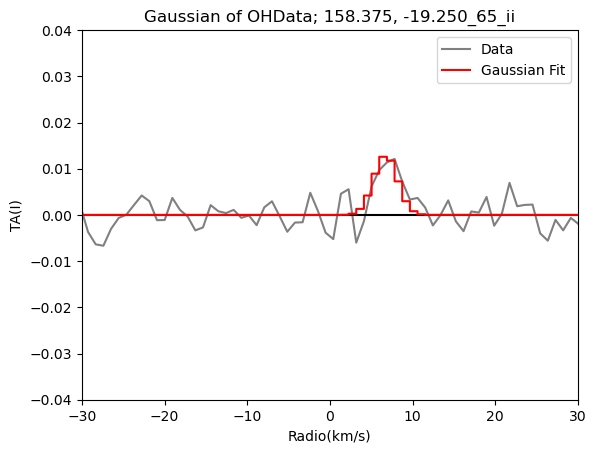

In [36]:
y_gauss_region = gauss_model.eval(fitResult[0].params, x=x)
# plot
plt.plot(x, y_sub, label='Data', linestyle='solid', color='grey')
plt.axhline(0, color='k')
plt.xlim([-30, 30])
plt.ylim([-.04, .04])
plt.step(x, y_gauss_region, '-',label='Gaussian Fit',color='red')
plt.xlabel('Radio(km/s)')
plt.ylabel('TA(I)')
plt.title('Gaussian of OHData; 158.375, -19.250_65_ii')
plt.legend()
plt.show()

In [37]:
# Computing the Integral
def integral(vel, ta, bounds, deltav):
    mask = (vel >= bounds[0]) & (vel <= bounds[1])
    deltav = vel[1]-vel[0]
    return np.sum(ta[mask])*deltav

In [38]:
vel = x
ta = y_sub
deltav = vel[1]-vel[0]
bounds = [-15, 15]
# Baseline Subtraction
poly_model = PolynomialModel(degree=4)
gooddata = np.where((vel >= -15) & (vel <= 15))[0]
params = poly_model.guess(ta[gooddata], x=vel[gooddata])
result = poly_model.fit(ta[gooddata], params, x=vel[gooddata])
y_eval = poly_model.eval(result.params, x=vel)
ta = y - y_eval
# Compute Integral
result = integral(vel, ta, bounds, deltav)
print(f"Integral from {bounds[0]} to {bounds[1]} = {result}")

Integral from -15 to 15 = 4.3483890490368955
